1. Perform linear regression on the "diabetes" sample data set.

    Follow this example https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

Train the model, evaluate the model's performance, and plot the results as is done in the example. 

(This is straight forom the scikit learn website)

Mean squared error: 2548.07
Coefficient of determination: 0.47


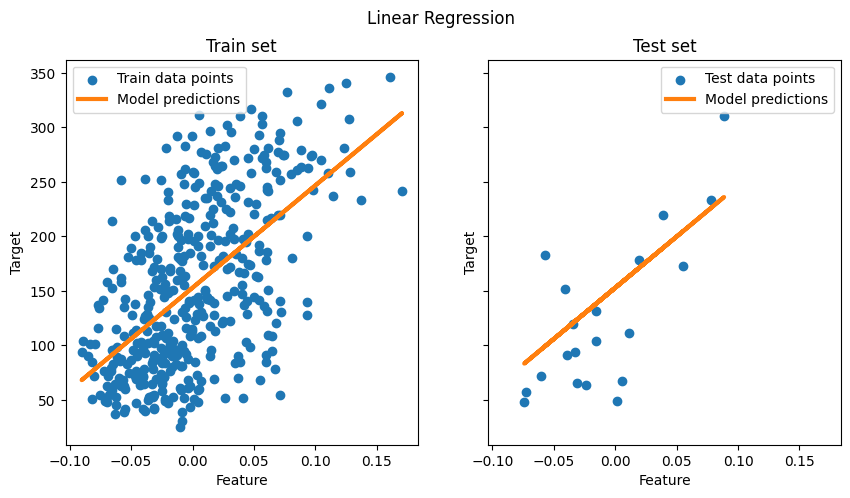

In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")


fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

Then train another model, this time using 2 of the features. Evaluate the model's performance and compare the Mean squared error and the r2_score to the 1 feature model.

Mean squared error: 4703.82
Coefficient of determination: 0.27


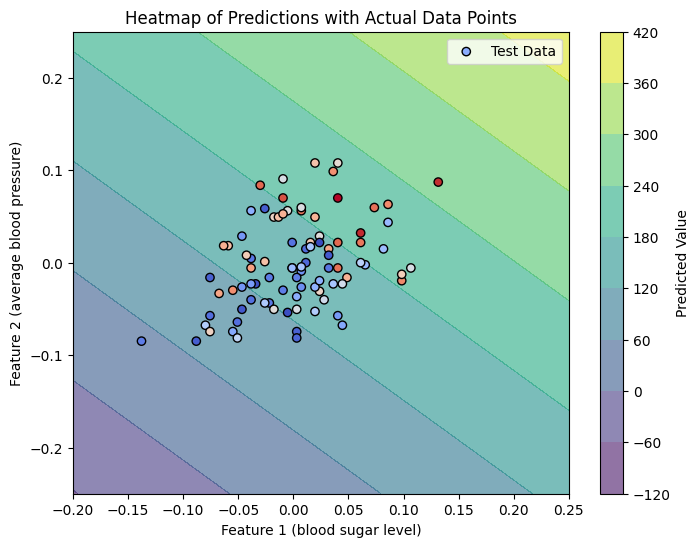

In [19]:
# Load the dataset
X, y = load_diabetes(return_X_y=True)

# Select two features (columns 2 and 3)
X = X[:, [9, 3]]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Train the linear regression model
regressor = LinearRegression().fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Evaluate model
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

# Create a meshgrid of feature 1 and feature 2 values
x_min, x_max = -0.2,0.25
y_min, y_max = -0.25,0.25
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Make predictions for each point on the grid
Z = regressor.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape predictions to match the grid shape
Z = Z.reshape(xx.shape)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.6)  # Heatmap for the predictions
plt.colorbar(label='Predicted Value')

# Plot actual data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', label="Test Data")
'''
    irst 10 columns are numeric predictive values
Target:

    Column 11 is a quantitative measure of disease progression one year after baseline
Attribute Information:

    0    age age in years
    1    sex
    2    bmi body mass index
    3    bp average blood pressure
    4    s1 tc, total serum cholesterol
    5    s2 ldl, low-density lipoproteins
    6    s3 hdl, high-density lipoproteins
    7    s4 tch, total cholesterol / HDL
    8    s5 ltg, possibly log of serum triglycerides level
    9    s6 glu, blood sugar level
'''
plt.xlabel('Feature 1 (blood sugar level)')
plt.ylabel('Feature 2 (average blood pressure)')
plt.title('Heatmap of Predictions with Actual Data Points')
plt.legend()
plt.show()


Making a 3D plot because we have 2 features to map

2. Perform classification on a dataset of handwritten digits (0-9) that have been digitized, using a support vector machine algorithm. To do this follow this example https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py


Make sure to plot the confusion matrix as is done in the example. 

Explain in your own words what the confusion matrix is. 

In [20]:

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

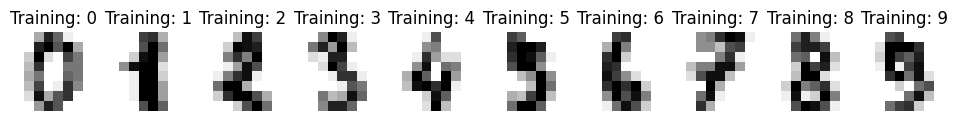

In [27]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(12, 5)) # Changed to show all 10 digits
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [28]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

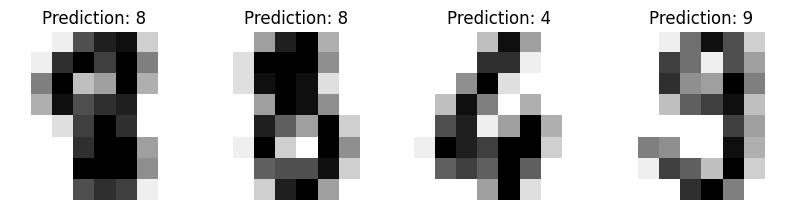

In [68]:
#This block is taken directly from the website
from PIL import Image
import os

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


The model got 6/10 of my hand-written numbers correct. (60.0% accuracy)


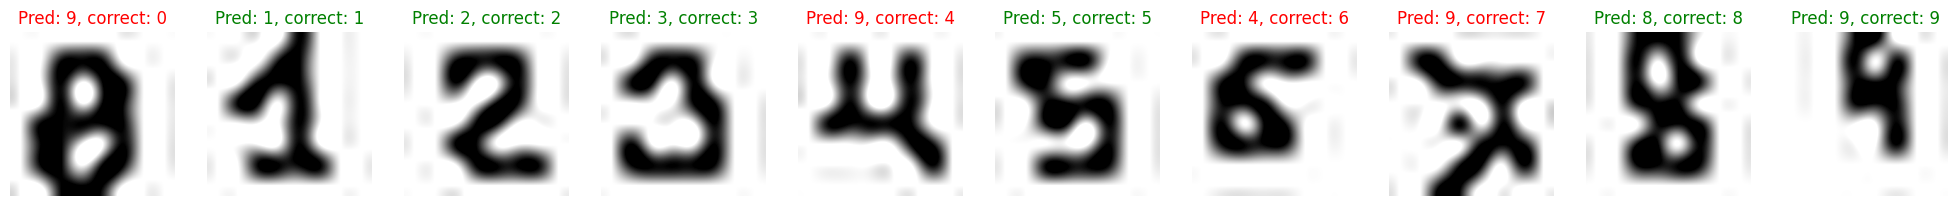

In [67]:
from PIL import ImageOps

# Load and preprocess custom images
custom_images = []
for digit in ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]:
    img = Image.open(f"Custom Numbers/{digit}.bmp").convert("L")  # Convert to grayscale
    img = ImageOps.invert(img)  # For some reason I have to imvert the image  because they get inverted at some step and cannot be recognized if left how they are.
    img = img.resize((8, 8), resample=Image.Resampling.LANCZOS)  # Resize to 8x8
    img_data = np.array(img) / 255.0 * 15.0 # The dataset seems to have pixel values ranging from 0-15 while my bmps go from 0-255 so i multiply them by 15/255 to normalize then to the dataset
    custom_images.append(img_data.flatten())

custom_images = np.array(custom_images)

# Predict the digits
custom_predictions = clf.predict(custom_images)

# Display the custom images and predictions
correct_count = 0
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(25, 5))
for i, (ax, image, prediction) in enumerate(zip(axes, custom_images, custom_predictions)):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="lanczos")
    if prediction == i:
        color = "green" 
        correct_count += 1
    else:
        color = "red"
    ax.set_title(f"Pred: {prediction}, correct: {i}", color=color)
print(f"The model got {correct_count}/10 of my hand-written numbers correct. ({correct_count/10 * 100}% accuracy)")